In [346]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

import random
import os

from collections import Counter

Go to <a href=#bookmark>where you left last time</a>

## Index

##### Find each penaties
<a href=#find_penalties>click here</a>
##### Data Analysis
<a href=#data_analysis>click here</a>

In [273]:
# load data
data = pickle.load(open("data.p", "rb"))
print("all data loaded")

all data loaded


In [274]:
# load occupation data
occupation_df = pd.read_csv('./pollution_data/pollution_utf-8.csv')
pollution_df = pd.read_csv("pollution_data/pollution_original_parsed_utf-8.csv")
#occupation_df

/Users/lyb/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (6,35,38,41,44) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [275]:
# case pid that needs to replace decision with original text
pid_to_clean = [16751486, 16779869, 17833099, 17260078, 16386368, 17854723, 18204393, 
                18121686, 16303999, 17880549, 16747969, 18556108, 17768986, 18272068, 
                17861588, 18236528, 16804369, 15805924, 16130419, 16804391, 17854920, 
                17892883, 16548949, 17726535, 17854769, 16937371, 17553407, 16477400, 
                18572909, 18121842, 17386832, 16307963, 17529776, 16141091, 18477846, 
                17606712, 17854856, 17768951, 17880547, 17386846, 16553356, 17854790, 
                15860598, 17768960, 16849436, 16493115, 17052388, 16779865, 15823719, 
                16227663, 17886537, 16477403, 18140376, 17821706, 16477406, 16937390, 
                16307954, 17553385, 16660047, 17260036, 17914091, 17415352, 17304043, 
                18103239, 17854928, 18103241, 17306733, 17387706, 16331678, 17529734, 
                17750527, 17212316, 18384178, 15874788, 16139252, 18607358, 18244282, 
                17133279, 15770529, 16906424, 17212320, 17013875, 18579602, 18384259, 
                16933713, 18384233, 16141066, 15665506, 16227662, 17854724, 18477972, 
                17529786, 18616041, 16639859, 17726475, 16954556, 17386840, 15867510, 
                15947032, 16472935, 17283491, 18600670, 17744828, 17750524, 16384480, 
                17744821, 16283346, 17576548, 16623283, 16384463, 15743182, 16187206, 
                17833100, 12003946, 17854738, 32702019, 16933708, 17052392, 17201601, 
                17760836, 17133297, 16583857, 18616103, 17216802, 16933706, 18477449, 
                18280074, 16278671, 18121802, 16141081, 18555980, 16682434, 16747976, 
                17212319, 8768242, 16369286, 19218472, 18317916, 16620991, 17386852, 
                16227639, 17756807, 18121820, 18280087, 16141076, 17892881, 17149624, 
                16883103, 16221127, 20637568, 27792714, 13616933, 12854287, 37512194, 
                27792690, 22353736, 34676864, 40570986, 27540145, 28840314, 22442625, 
                18600674, 27321501, 18887066, 28748106, 28690224, 15949875, 26432778, 
                22102978, 28927760, 3695664, 20425414, 17013718, 27136340, 28690228, 
                11894141, 27321503, 18883850, 27334783, 26048728, 5477154, 22139672, 
                16923148, 26432777]

---
## Find occupation of defendents (if data avialable)

In [276]:
def index_clean():
    """index that needs to be replaceed by original decision text"""
    index_to_fill_1 = [37, 122, 176, 224, 230, 235, 240, 259, 283, 286, 296, 336, 352, 
                 353, 403, 439, 486, 505, 506, 567, 709, 767, 771, 798, 857, 869, 
                 874, 928, 984, 1024, 1100, 1135, 1155, 1158, 1207, 1233, 1276, 
                 1297, 1298, 1326, 1376, 1389, 1400, 1511, 1536, 1543, 1584, 1634, 
                 1648, 1693, 1717, 1746, 1761, 1782, 1808, 1812, 1873, 1904, 1905, 
                 1919, 1985, 1994, 2012, 2035, 2045, 2072, 2089, 2149, 2184, 2212, 
                 2250, 2276, 2366, 2407, 2422, 2428, 2483, 2484, 2491, 2564, 2591, 
                 2603, 2673, 2680, 2691, 2719, 2726, 2727, 2743, 2779, 2780, 2791, 
                 2826, 2839, 2916, 2950, 3041, 3055, 3110, 3168, 3169, 3257, 3262, 
                 3263, 3288, 3292, 3430, 3487, 3505, 3541, 3563, 3592, 3629, 3681, 
                 3780, 3795, 3822, 3838, 3893, 3897, 3906, 3907, 3923, 3991, 4011, 
                 4032, 4033, 4056, 4076, 4127, 4288, 4319, 4479, 4604, 4625, 4639, 
                 4770, 4800, 4849, 4852, 4940, 4991, 5000, 5013, 5021, 5065, 5182, 
                 5317, 5331, 5345, 5494, 5556, 5559, 5652, 5680, 5696, 5697, 5948, 
                 5950, 5965, 5979, 6021, 6033, 6044, 6059, 6089]
    index_to_fill_2 = [52, 57, 735, 1437, 1523, 1996, 2039, 2630, 3147, 5088, 5688, 5734]
    index_to_fill_3 = [115, 322, 326, 762, 1040, 1553, 1661, 1667, 2279, 
                       2444, 2561, 2659, 2776, 2781, 3602, 3834, 4115, 4382, 4398, 
                       4415, 4529, 4709, 4934, 5022, 5511, 5631, 5694, 5923]
    return index_to_fill_1 + index_to_fill_2 + index_to_fill_3

index_cleaned = index_clean()

In [328]:
# for cases in data:
#     for decision in cases:
#         decision_lst = list(decision.keys())
#         try:
#             defendent = decision['被告人']
#         except:
#             defendent = None
#         for penalty in decision_lst:
#             if penalty == 'pid' and defendent is not None:
#                 row = occupation_df.loc[(occupation_df['Id'] == decision[penalty]) & (occupation_df['Name'] == defendent)]['Position'].dropna()
#                 if len(row) > 0:
#                     occupation = row.iloc[0]
#                     decision['职业'] = occupation
# data

In [278]:
# import pickle
# pickle.dump(data, open("data.p", "wb"))
# print("data saved")

---
 <a name='find_penalties'/>

## Find each penalties

In [326]:
imprisonment = []
detention = []
suspended = []
fines = []
imprisonment_count = 0
detention_count = 0
suspended_count = 0
fines_count = 0

total_count = 0

for cases in data:
    for decision in cases:
        decision_lst = list(decision.keys())
        for penalty in decision_lst:
#             print(penalty)
#             print(decision[penalty])
#             print(penalty == "有期徒刑")
            if (penalty == "免予处罚") and (decision[penalty]):
                pass
            elif penalty == "有期徒刑":
                imprisonment.append(decision[penalty])
                imprisonment_count += 1
                total_count += 1
            elif penalty == "罚金":
                fines.append(decision[penalty])
                fines_count += 1
                total_count += 1
            elif penalty == "缓刑":
                suspended.append(decision[penalty])
                suspended_count += 1
                total_count += 1
            elif penalty == "拘役":
                detention.append(decision[penalty])
                detention_count += 1
                total_count += 1
# print(imprisonment)
# print()
# print(detention)
# print()
# print(suspended)
# print()
# print(fines)

In [327]:
# create character number to int number dictionary
char = ["零", "一", "二", "三", "四", "五", "六", "七", "八", "九", "十"]
char_sub = ["壹", "贰", "叁", "肆", "伍", "陆", "柒", "捌", "玖", "拾"]
char_num = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10"]
char2num_sub = dict([(value, key+1) for key, value in dict(enumerate(char_sub)).items()])
char2num = dict([(value, key) for key, value in dict(enumerate(char)).items()])
char2num_num = dict([(value, key) for key, value in dict(enumerate(char_num)).items()])
char2num["两"] = 2
char2num["万"] = 10000
char2num["千"] = 1000
char2num["仟"] = 1000
char2num["百"] = 100
char2num.update(char2num_sub)
char2num.update(char2num_num)
# char2num

In [283]:
def find_year_month(i):
    year_num, month_num = 0, 0
    try:
        if "缓刑" in i:
            decision = i.split("缓刑")[1]
        else:
            decision = i
        if ("年" in decision) and ("月" in decision):
            # convert string to list, and iterate the list to find year number
            year_char = decision.split("年")[0]
            if len(year_char) > 1:
                raise ValueError('year_char is more then 10 years')
            for k in list(year_char):
                year_num += char2num[k]

            # same idea as above, find month number
            month_char = decision.split("年")[1].split("月")[0]
            month_char = month_char.split("个")[0]
            for j in list(month_char):
                month_num += char2num[j]
        elif ("年" in decision) and ("月" not in decision):
            year_char = decision.split("年")[0]
            if len(year_char) > 1:
                raise ValueError('year_char is more then 10 years')
            for k in list(year_char):
                year_num += char2num[k]
        elif ("年" not in decision) and ("月" in decision):
            month_char = decision.split("月")[0]
            month_char = month_char.split("个")[0]
            # handle string integer
            try:
                month_num = int(month_char)
            except:
                for j in list(month_char):
                    month_num += char2num[j]
    except:
        pass
    return {'year':year_num, 'month':month_num}

In [284]:
#fines

In [285]:
def find_detention(i):
    month_num, day_num = 0, 0
    try:
        if "缓刑" in i:
            decision = i.split("缓刑")[0]
        else:
            decision = i
        if "月" in decision:
            # convert string to list, and iterate the list to find month number
            month_char = decision.split("月")[0]
            month_char = month_char.split("个")[0]
            for k in list(month_char):
                month_num += char2num[k]
                
            # same idea as above, find day number
            if "天" in decision:
                day_char = decision.split("月")[1].split("天")[0]
                for j in list(day_char):
                    day_num += char2num[j]
            elif "日" in decision:
                day_char = decision.split("月")[1].split("日")[0]
                for j in list(day_char):
                    day_num += char2num[j]
        elif ("天" in decision) and ("月" not in decision):
            day_char = decision.split("月")[1].split("天")[0]
            for j in list(day_char):
                day_num += char2num[j]
        elif ("日" in decision) and ("月" not in decision):
            day_char = day_char.split("日")[0]
            for j in list(day_char):
                day_num += char2num[j]
#             # handle integer string
#             try:
#                 month_num = int(month_char)
#             except:
#                 for j in list(month_char):
#                     month_num += char2num[j]
    except:
        pass
    return {'month':month_num, 'day':day_num}

In [286]:
# chinese2digits credit to zhengdan66
def chinese2digits(uchars_chinese):
    total = 0
    r = 1 
    for i in range(len(uchars_chinese) - 1, -1, -1):
        val = char2num.get(uchars_chinese[i])
        if val >= 10 and i == 0:  
            if val > r:
                r = val
                total = total + val
            else:
                r = r * val
                # total =total + r * x
        elif val >= 10:
            if val > r:
                r = val
            else:
                r = r * val
        else:
            total = total + r * val
    return total

def find_fines(i):
    fine_num = 0
    if "元" in i:
        if "人民币" in i:
            fine_char = i.split("人民币")[1]
        elif "人民" in i:
            fine_char = i.split("人民")[1]
        elif "共计" in i:
            fine_char = i.split("共计")[1]
        else:
            fine_char = i
        fine_char = fine_char.split("元")[0]
        if "," in fine_char:
                fine_char = fine_char.split(",")
                fine_char = "".join(fine_char)
        if "." in fine_char:
            if fine_char[-1] != '万':
                fine_char = fine_char.split(".")[0]
            else:
                fine_char = float(fine_char[:len(fine_char)-1])*10000

        # handle integer string
        try:
            fine_num = int(fine_char)
        except:
            if (fine_char is not "") and (fine_char[-1] == '万'):
                fine_num = 10000*(chinese2digits(fine_char[:len(fine_char)-1]))
            else:
                fine_num = chinese2digits(fine_char)
    else:
        pass
    if fine_num == 10080500000:
        print(i)
    return {"fine":fine_num}

In [287]:
detention_result = []
for i in detention:
    m = find_detention(i)
    if (m['day'] != 0) or (m['month'] != 0):
        detention_result.append(m)
# detention_result

In [288]:
suspended_result = []
for i in suspended:
    m = find_year_month(i)
    if (m['year'] != 0) or (m['month'] != 0):
        suspended_result.append(m)
#suspended_result

In [289]:
imprisonment_result = []
for i in imprisonment:
    m = find_year_month(i)
    if (m['year'] != 0) or (m['month'] != 0):
        imprisonment_result.append(m)
#imprisonment_result

In [290]:
fines_result = []
for i in fines:
    m = find_fines(i)
    if m['fine'] != 0:
        fines_result.append(m)
#fines_result

In [291]:
chinese2digits('一千八百五十万')

10080500000

---
 <a name='data_analysis'/>

# Data analysis

Build a result table that shows the statistics of the data

##### Find top 5 companies that pay the most fine
<a href=#top_companies>click here</a>
##### How does defendent's occupation affect their penalties
<a href=#occupation_penalties>click here</a>

In [293]:
# convert all dict list to numerical list
y = []
m = []
d = []
imprisonment_arr = []
detention_arr = []
suspended_arr = []
for c in imprisonment_result:
    y.append(c['year'])
    m.append(c['month'])
    imprisonment_arr.append(c['year'] * 12 + c['month'])
imprisonment_arr = np.array(imprisonment_arr)

for c in detention_result:
    d.append(c['day'])
    m.append(c['month'])
    detention_arr.append(c['month'] * 30 + c['day'])
detention_arr = np.array(detention_arr)

for c in suspended_result:
    y.append(c['year'])
    m.append(c['month'])
    suspended_arr.append(c['year'] * 12 + c['month'])
suspended_arr = np.array(suspended_arr)

fine_arr = np.array([i['fine'] for i in fines_result])
all_arr = [imprisonment_arr, suspended_arr, detention_arr, fine_arr]


In [294]:
# helper function
def add_comma(s):
    count = 0
    result = ''
    if len(s) < 1:
        return result
    if '.' in s:
        return add_comma(s.split('.')[0]) + '.' + s.split('.')[1]
    for i in range(1, len(s)+1):
        if count == 3:
            result = ',' + result
            count = 0
        result = s[-i] + result
        count += 1
    return result

In [295]:
i_stats_result = []
total_stats_result = []

for i_arr in all_arr:
    i_max = np.max(i_arr)
    i_min = np.min(i_arr)
    i_mean = np.around(np.mean(i_arr), decimals=2)
    i_median = np.median(i_arr)
    i_std = np.around(np.std(i_arr), decimals=2)
    i_mode = str(stats.mode(i_arr)[0][0]) + ", count: " + str(stats.mode(i_arr)[1][0])
    i_stats_result = [i_max, i_min, i_mean, i_median, i_std, i_mode]
    total_stats_result.append(i_stats_result)
df = pd.DataFrame(np.array(total_stats_result),columns=['max', 'min', 'mean', 'median', 'std', 'mode'])
df

,max,min,mean,median,std,mode
0,120,4,12.33,10.0,7.87,"12, count: 1768"
1,60,2,16.29,12.0,8.54,"12, count: 1761"
2,180,30,130.36,120.0,36.65,"150, count: 446"
3,18500000,1000,35070.22,14000.0,219958.28,"10000, count: 2487"


In [296]:
df.rename(index={0:'imprisonment', 1:'suspended', 2:'detention', 3:'fine'}, inplace=True)

# find penalty ratio in the data
imprisonment_ratio = np.around((imprisonment_count/total_count)*100, decimals=2)
suspended_ratio = np.around((suspended_count/total_count)*100, decimals=2)
detention_ratio = np.around((detention_count/total_count)*100, decimals=2)
fines_ratio = np.around((fines_count/total_count)*100, decimals=2)

for j in range(2):
    for i in range(len(df.iloc[j]) - 1):
        df.iloc[j][i] = df.iloc[j][i] + " months"
    # df.iloc[0][0] = df.iloc[0][0] + "月"
for i in range(len(df.iloc[2]) - 1):
    df.iloc[2][i] = df.iloc[2][i] + " days"
for i in range(len(df.iloc[3]) - 1):
    df.iloc[3][i] = add_comma(df.iloc[3][i]) + " CNY"
df.iloc[0][5] = df.iloc[0][5][:2] + " months" + df.iloc[0][5][2:]
df.iloc[1][5] = df.iloc[1][5][:2] + " months" + df.iloc[1][5][2:]
df.iloc[2][5] = df.iloc[2][5][:3] + " days" + df.iloc[2][5][3:]
df.iloc[3][5] = df.iloc[3][5][:5] + " CNY" + df.iloc[3][5][5:]
df.insert(6, 'ratio(%)', np.array([imprisonment_ratio, suspended_ratio, detention_ratio, fines_ratio]))
df

,max,min,mean,median,std,mode,ratio(%)
imprisonment,120 months,4 months,12.33 months,10.0 months,7.87 months,"12 months, count: 1768",35.49
suspended,60 months,2 months,16.29 months,12.0 months,8.54 months,"12 months, count: 1761",15.50
detention,180 days,30 days,130.36 days,120.0 days,36.65 days,"150 days, count: 446",6.04
fine,"18,500,000 CNY","1,000 CNY","35,070.22 CNY","14,000.0 CNY","219,958.28 CNY","10000 CNY, count: 2487",42.97


---
## Data Visualization

### Imprisonment

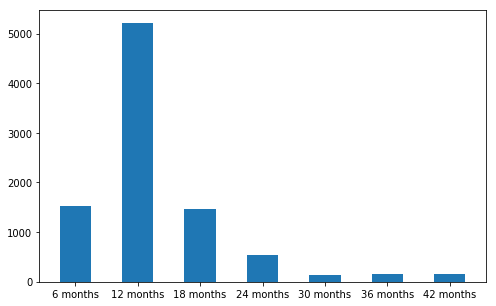

[1522, 5213, 1458, 531, 133, 160, 150]


In [297]:
imprisonment_label = ["6 months", "12 months", "18 months", "24 months", "30 months",
                      "36 months", "42 months"]
imprisonment_value = []
for i in range(1, 7):
    imprisonment_value.append(len([n for n in imprisonment_arr if n <= i*6 and n > (i-1)*6]))
imprisonment_value.append(len([n for n in imprisonment_arr if n > (6)*6]))
plt.figure(figsize=(8, 5))
plt.bar(imprisonment_label, imprisonment_value, width=0.5)
plt.show()
print(imprisonment_value)

### Suspended

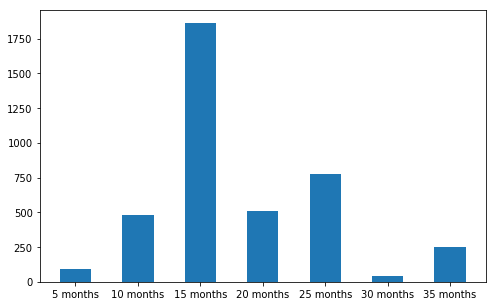

[91, 481, 1862, 507, 772, 40, 249]


In [298]:
suspended_label = ["5 months", "10 months", "15 months", "20 months", "25 months",
                      "30 months", "35 months"]
suspended_value = []
for i in range(1, 7):
    suspended_value.append(len([n for n in suspended_arr if n <= i*5 and n > (i-1)*5]))
suspended_value.append(len([n for n in suspended_arr if n > 7*5]))
plt.figure(figsize=(8, 5))
plt.bar(suspended_label, suspended_value, width=0.5)
plt.show()
print(suspended_value)

### Detention

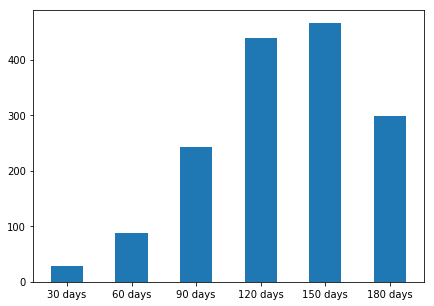

[29, 87, 242, 438, 466, 299]


In [299]:
detention_label = ["30 days", "60 days", "90 days", "120 days", "150 days",
                      "180 days"]
detention_value = []
for i in range(1, 7):
    detention_value.append(len([n for n in detention_arr if n <= i*30 and n > (i-1)*30]))
plt.figure(figsize=(7, 5))
plt.bar(detention_label, detention_value, width=0.5)
plt.show()
print(detention_value)

### Fine

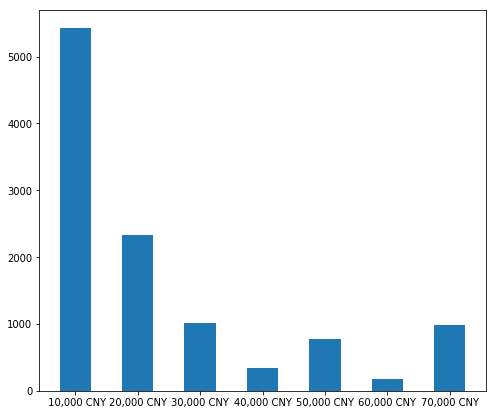

[5421, 2328, 1019, 337, 771, 181, 987]


In [300]:
fine_label = [" 10,000 CNY", "20,000 CNY", "30,000 CNY", "40,000 CNY", "50,000 CNY",
                      "60,000 CNY", "70,000 CNY"]
fine_value = []
for i in range(1, 7):
    fine_value.append(len([n for n in fine_arr if n <= i*10000 and n > (i-1)*10000]))
fine_value.append(len([n for n in fine_arr if n > 6*10000]))
plt.figure(figsize=(8, 7))
plt.bar(fine_label, fine_value, width=0.5)
plt.show()
print(fine_value)

### Data analysis for individual and for company

In [301]:
# find company defendent
data_company = [j for i in data for j in i if '被告单位' in j.keys()]
# data_company

In [302]:
# find individual defendent
data_individual = [j for i in data for j in i if '被告人' in j.keys()]
# data_individual 

In [303]:
print("number of companies involved: ", len(data_company))
print("number of people involved: ", len(data_individual))

number of companies involved:  449
number of people involved:  10504


In [304]:
# company result
fines = []
for decision in data_company:
    decision_lst = list(decision.keys())
    for penalty in decision_lst:
        if (penalty == "免予处罚") and (decision[penalty]):
            pass
        elif penalty == "罚金":
            fines.append(decision[penalty])
company_fines_result = []
for i in fines:
    m = find_fines(i)
    if m['fine'] != 0:
        company_fines_result.append(m)
company_fine_arr = np.array([i['fine'] for i in company_fines_result])
# company_fine_arr

In [305]:
# person result
fines = []
for decision in data_individual:
    decision_lst = list(decision.keys())
    for penalty in decision_lst:
        if (penalty == "免予处罚") and (decision[penalty]):
            pass
        elif penalty == "罚金":
            fines.append(decision[penalty])
individual_fines_result = []
for i in fines:
    m = find_fines(i)
    if m['fine'] != 0:
        individual_fines_result.append(m)
individual_fine_arr = np.array([i['fine'] for i in individual_fines_result])
# individual_fine_arr

In [306]:
# find statistical data
company_max = np.max(company_fine_arr)
company_min = np.min(company_fine_arr)
company_mean = np.around(np.mean(company_fine_arr), decimals=2)
company_median = np.median(company_fine_arr)
company_std = np.around(np.std(company_fine_arr), decimals=2)
company_mode = str(stats.mode(company_fine_arr)[0][0]) + ", count: " + str(stats.mode(company_fine_arr)[1][0])
company_stats_result = [company_max, company_min, company_mean, company_median, company_std, company_mode]

individual_max = np.max(individual_fine_arr)
individual_min = np.min(individual_fine_arr)
individual_mean = np.around(np.mean(individual_fine_arr), decimals=2)
individual_median = np.median(individual_fine_arr)
individual_std = np.around(np.std(individual_fine_arr), decimals=2)
individual_mode = str(stats.mode(individual_fine_arr)[0][0]) + ", count: " + str(stats.mode(individual_fine_arr)[1][0])
individual_stats_result = [individual_max, individual_min, individual_mean, individual_median, individual_std, individual_mode]

fines_df = pd.DataFrame(np.array([company_stats_result, individual_stats_result]),columns=['max', 'min', 'mean', 'median', 'std', 'mode'])

# modify the table for better visualization
for index, j in fines_df.iterrows():
    for i in range(len(fines_df.iloc[index]) - 1):
        fines_df.iloc[index][i] = add_comma(fines_df.iloc[index][i]) + " CNY"
    fines_df.iloc[index][5] = add_comma(fines_df.iloc[index][5][:5]) + " CNY" + fines_df.iloc[index][5][5:]
fines_df.rename(index={0:'company fines', 1:'individual fines'}, inplace=True)
fines_df

,max,min,mean,median,std,mode
company fines,"18,500,000 CNY","5,000 CNY","258,145.65 CNY","80,000.0 CNY","1,043,162.85 CNY","50,000 CNY, count: 76"
individual fines,"2,100,000 CNY","1,000 CNY","25,552.96 CNY","10,000.0 CNY","51,742.18 CNY","10,000 CNY, count: 2331"


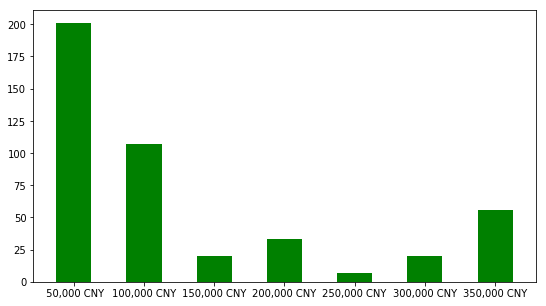

[201, 107, 20, 33, 7, 20, 56]


In [307]:
company_fine_label = [" 50,000 CNY", "100,000 CNY", "150,000 CNY", "200,000 CNY", "250,000 CNY",
                      "300,000 CNY", "350,000 CNY"]
company_fine_value = []

for i in range(1, 7):
    company_fine_value.append(len([n for n in company_fine_arr if n <= i*50000 and n > (i-1)*50000]))
company_fine_value.append(len([n for n in company_fine_arr if n > 6*50000]))
    
plt.figure(figsize=(9, 5))
# ax = plt.subplot(111)
# ax.bar(fine_label, company_fine_value)
# ax.bar(fine_label, individual_fine_value)
plt.bar(company_fine_label, company_fine_value, color='g', width=0.5)
plt.show()
print(company_fine_value)

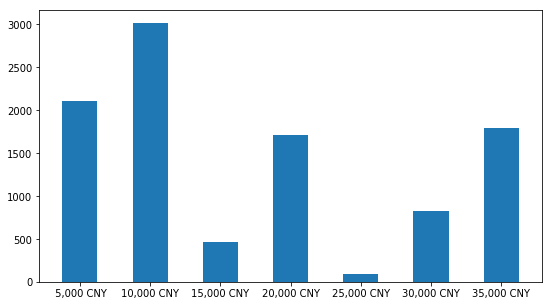

[2101, 3015, 461, 1710, 94, 828, 1794]


In [308]:
individual_fine_label = [" 5,000 CNY", "10,000 CNY", "15,000 CNY", "20,000 CNY", "25,000 CNY",
                      "30,000 CNY", "35,000 CNY"]

individual_fine_value = []
for i in range(1, 7):
    individual_fine_value.append(len([n for n in individual_fine_arr if n <= i*5000 and n > (i-1)*5000]))
individual_fine_value.append(len([n for n in individual_fine_arr if n > 6*5000]))

plt.figure(figsize=(9, 5))
plt.bar(individual_fine_label, individual_fine_value, width=0.5)
plt.show()
print(individual_fine_value)

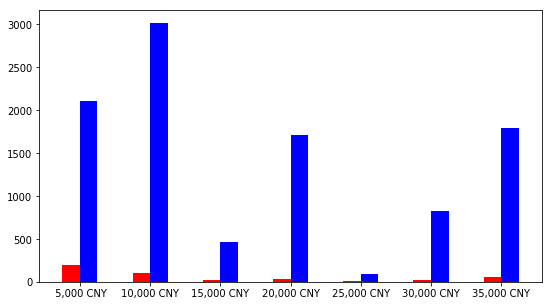

In [309]:
plt.figure(figsize=(9, 5))
ax = plt.subplot(111)
wid = 0.25
com = [i - wid/2 for i in range(1, 8)]
ind = [i + wid/2 for i in range(1, 8)]


ax.bar(com, company_fine_value, color='r', width=wid)
ax.bar(ind, individual_fine_value, color='b', width=wid)
plt.xticks(np.arange(1, 8), individual_fine_label)

plt.show()

---
 <a name='top_companies' />

### Find top 5 companies that pay the most fine

In [310]:
fine_arr.sort()
top_5 = [fine_arr[-i] for i in range(1, 6)]
top_5

[18500000, 8000000, 5000000, 5000000, 2450000]

In [311]:
top_5_decision = []
for cases in data:
    for decision in cases:
        decision_lst = list(decision.keys())
        for penalty in decision_lst:
            if penalty == "罚金":
                num_fine = find_fines(decision[penalty])
#                 print(num_fine['fine'])
                if num_fine['fine'] in top_5:
                    top_5_decision.append(decision)
top_5_decision[4]['被告单位'] = '宁夏某某染化有限公司'
top_5_decision

[{'被告单位': '瑞安宝源化工有限公司', '罚金': '人民币8000000元', 'pid': 17078470},
 {'被告单位': '无锡双象超纤材料股份有限公司', '罚金': '人民币五百万元', 'pid': 14973975},
 {'被告单位': '某某（河北）焦化有限公司', '罚金': '人民币二百四十五万元', 'pid': 28286322},
 {'被告单位': '某', '罚金': '人民币一千八百五十万元', 'pid': 18390772},
 {'被告单位': '宁夏某某染化有限公司', '罚金': '人民币五百万元', 'pid': 4080709}]

In [325]:
row = pollution_df.where(pollution_df['pid'] == 4080709).dropna()
# row

In [324]:
# print(pollution_df['originaltext'][4780])

---
## Find defendants that actually go to jail
Imprisonment time is longer than suspended time

In [315]:
# modify data list
# year_month = 0
# go_jail = []
# no_jail = []
# for cases in data:
#     for decision in cases:
#         suspended_time = 0
#         imprisonment_time = 0
#         decision_lst = list(decision.keys())
#         if "缓刑" in decision_lst or "有期徒刑" in decision_lst:
#             for penalty in decision_lst:
#                 if penalty == "缓刑":
#                     year_month = find_year_month(decision[penalty])
#                     suspended_time = year_month['year'] * 12 + year_month['month']
#                 elif penalty == "有期徒刑":
#                     year_month = find_year_month(decision[penalty])
#                     imprisonment_time = year_month['year'] * 12 + year_month['month']
#                 if suspended_time > imprisonment_time:
#                     decision["有效时间(月)"] = 0
#                     no_jail.append(decision)
#                 elif suspended_time < imprisonment_time:
#                     decision["有效时间(月)"] = imprisonment_time - suspended_time
#                     go_jail.append(decision)
#                 elif suspended_time == imprisonment_time:
#                     decision["有效时间(月)"] = 0
#                     no_jail.append(decision)
# print("number of defendents that actually go to jail: ", len(go_jail))
# print("number of defendents that don't go to jail: ", len(no_jail))
# data

In [314]:
# find the total number of defendents in all cases
total_defendent = 0
for cases in data:
    cases_len = len(cases)
    total_defendent += cases_len
total_defendent

11583

In [319]:
go_jail = []
no_jail = []
for cases in data:
    for decision in cases:
        if decision.get('有效时间(月)', -1) > 0:
            go_jail.append(decision)
        else:
            no_jail.append(decision)
print("number of defendents that actually go to jail: ", len(go_jail))
print("number of defendents that don't go to jail: ", len(no_jail))

number of defendents that actually go to jail:  5826
number of defendents that don't go to jail:  5757


In [353]:
effective_time_arr = []
for case in go_jail:
    effective_time_arr.append(case['有效时间(月)'])
# effective_time_arr

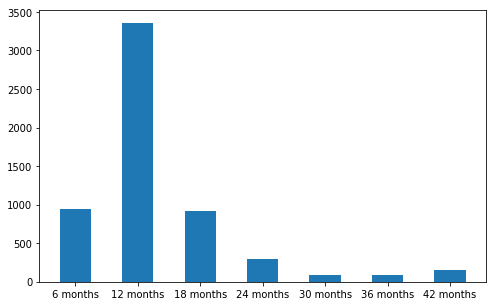

[940, 3356, 915, 291, 84, 92, 148]


In [354]:
effective_time_label = ["6 months", "12 months", "18 months", "24 months", "30 months",
                      "36 months", "42 months"]
effective_time_value = []
for i in range(1, 7):
    effective_time_value.append(len([n for n in effective_time_arr if n <= i*6 and n > (i-1)*6]))
effective_time_value.append(len([n for n in effective_time_arr if n > (6)*6]))
plt.figure(figsize=(8, 5))
plt.bar(effective_time_label, effective_time_value, width=0.5)
plt.show()
print(effective_time_value)

In [250]:
# import pickle
# pickle.dump(data, open("data.p", "wb"))
# print("data saved")

data saved


---
 <a name='occupation_penalties' />

## How does defendent's occupation affect their penalties 

In [349]:
# data_with_occupation: the data file but only contains decision that has occupation
# occupation_lst: the list of all occupation
# occupation_dict: dict that contains all info in the data_with_occupation but 
# categorized them based on occupation
occupation_lst = []
data_with_occupation = []
occupation_dict = {}

for cases in data:
    for decision in cases:
        occupation = decision.get('职业', 0)
        if occupation != 0:
            data_with_occupation.append(decision)
            occupation_lst.append(occupation)

c = Counter(occupation_lst)
occupation_count = dict(c.most_common(20))
len(data_with_occupation)
for decision in data_with_occupation:
    # if the list exists
    if occupation_dict.get(decision['职业'], 0):
        occupation_dict[decision['职业']].append(decision)
    else:
        occupation_dict[decision['职业']] = [decision]
occupation_dict
    

{'群众': [{'被告人': '陈某', '拘役': '四个月', '罚金': '五千元', 'pid': 28511110, '职业': '群众'},
  {'被告人': '李某',
   '有期徒刑': '八个月',
   '罚金': '20000元',
   'pid': 28286594,
   '职业': '群众',
   '有效时间(月)': 8},
  {'被告人': '乔某某',
   '有期徒刑': '十个月',
   '罚金': '人民币一万元',
   'pid': 28840161,
   '职业': '群众',
   '有效时间(月)': 10},
  {'被告人': '韦祖元',
   '有期徒刑': '八个月',
   '罚金': '人民币二万元',
   'pid': 11538985,
   '职业': '群众',
   '有效时间(月)': 8},
  {'被告人': '李刚',
   '有期徒刑': '七个月',
   '罚金': '人民币二万元',
   'pid': 11538985,
   '职业': '群众',
   '有效时间(月)': 7},
  {'被告人': '王某',
   '有期徒刑': '十一个月',
   '罚金': '人民币三万元',
   'pid': 28526477,
   '职业': '群众',
   '有效时间(月)': 11},
  {'被告人': '杜某某',
   '有期徒刑': '十一个月',
   '罚金': '人民币一万五千元',
   'pid': 28526477,
   '职业': '群众',
   '有效时间(月)': 11},
  {'被告人': '刘某某', '拘役': '六个月', '罚金': '人民币一万五千元', 'pid': 28526477, '职业': '群众'},
  {'被告人': '毛彦达',
   '有期徒刑': '七个月',
   '罚金': '人民币七千元',
   'pid': 28676525,
   '职业': '群众',
   '有效时间(月)': 7},
  {'被告人': '李辛虎',
   '有期徒刑': '十个月',
   '罚金': '人民币一万元',
   'pid': 28732135,
   '职业': '群众',
  

Last time Left off here <a name='bookmark' />

---
## Find x random samples from data

In [230]:
# x: the number of samoles
x = 200

In [323]:
random.seed(101)
if "Random {0} cases.txt".format(x) in os.listdir("./"):
    os.remove("Random {0} cases.txt".format(x))
    print("old txt file removed")
file1 = open("Random {0} cases.txt".format(x),"a")
pid_lst = []
parsed_result = []
original_decision = []
original_text = []
for i in range(x):
    index = random.randint(0, len(data))
    
    pid = data[index][0]['pid']
    row_index = pollution_df.loc[pollution_df['pid'] == pid].index[0]
    
    pid_lst.append(pid)
    parsed_result.append(data[index])
    
    if pid not in pid_to_clean:
        original_decision.append(pollution_df['decision'][row_index])
    else:
        original_decision.append(pollution_df['originaltext'][row_index])
    
    original_text.append(pollution_df['originaltext'][row_index])

# random_cases_df = pd.DataFrame({"pid":pid_lst, "parsed_result":parsed_result, 
#                                 "original_decision":original_decision, 
#                                 "original_text":original_text})

#     print(data[index], '\n')
#     print(pollution_df['originaltext'][row_index])

    # save to txt file
    file1.write("case {0}, pid: {1}".format(i+1, pid) + '\n')
    file1.write(str(data[index]) + '\n')
    file1.write('\n')
    file1.write(str(pollution_df['originaltext'][row_index]))
    for i in range(5):
        file1.write('\n')

file1.close()

random_cases_df = pd.DataFrame({"correct":[0 for i in range(len(pid_lst))], "pid":pid_lst, "parsed_result":parsed_result, 
                                "original_decision":original_decision})
random_cases_df.to_csv("./random_cases_df.csv", encoding="utf-8-sig")
print("new files saved")

old txt file removed
new files saved
